## Pre-lecture hw

DID NOT USE A CHATBOT FOR PRE-LECTURE HW

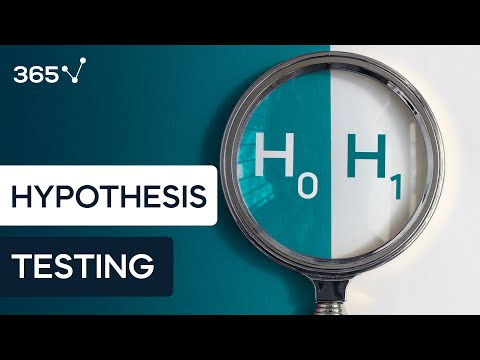

In [11]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

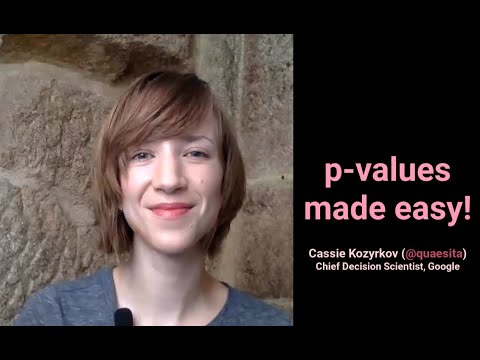

In [12]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

### 1.

What is the key factor that makes the difference between ideas that can, and cannot be examined and tested statistically? The key factor is whether the idea is comparable using data. An idea can be tested statistically if there is quantifiable data to examine and compare against.

What would you describe is the key "criteria" defining what a good null hypothesis is? A good null hypothesis represents the status quo or a default assumption. It should be clear, testable, and capable of being rejected or not rejected based on the data.

What is the difference between a null hypothesis and an alternative hypothesis in the context of hypothesis testing? The null hypothesis assumes that no change has been made, while the alternative hypothesis represents an effect that challenges the status quo. The goal of hypothesis testing is to determine if there is enough evidence to reject the null hypothesis.

### 2.

The sentence in the image is explaining that when we conduct statistical tests, we are interested in making inferences about the entire population from which we took our sample, rather than just describing the sample itself.
For non-statistic audience: When we collect data, it's just a small part of a bigger picture (like a taste test of a drink). We use that small part (sip) to make an educated guess about the whole population (drink). Our tests are designed to tell us something about the entire population (drink), not just the sample itself (the one sip we took).

### 3.

Why do we "imagine a world where the null hypothesis is true" when calculating a p-value?


We "imagine a world where the null hypothesis is true" when calculating a p-value because the p-value helps us measure how surprising the observed data would be if there really was no change—essentially if the null hypothesis was correct.


A more detailed explanation (for myself for the future):
- The null hypothesis represents the default assumption or "status quo".
- The p-value tells us, "If the null hypothesis is true, how likely is it to get the results we're expecting?"
- If the p-value is very small, it means that the result we're expecting under the null hypothesis is unlikely underand the null hypothesis is probably false. 
- If the p-value is larger, it means the data is consistent with the null hypothesis, so it's probably true.

### 4.

Why does a smaller p-value make the null hypothesis look more ridiculous?

When the p-value is very small, it suggests that the data doesn't fit well with the world where the null hypothesis is true. This makes the null hypothesis look "ridiculous" because it's hard to believe that such extreme data could happen by random chance alone.


Example: Let's say a random person Paul claimed he's going to get a 100 on his next stat exam, the null hypothesis for this is assuming Paul's statement is true. However, upon reviewing the previous data (all the other times he claimed to get a 100 on stat and got 'x' mark not equal to 100), we calculated a small p-value. This basically tells us that Paul might not get a 100 on this stat exam. If we calculated a very very small p-value that likely means the 'x' mark that Paul was a lot less than 100, and since we calculated a very very small p-value it would be ridiculous to assume that his statement (null hypothesis) is true.

### 5.

In [10]:
import numpy as np

simulated_right_tilts = np.random.binomial(124, 0.5, 10000)

p_value = np.sum(simulated_right_tilts >= 80) / 10000
p_value

0.0012

The p-value I got for this simulation is 0.0012 which falls in the range 0.01 ≥ p > 0.001 which means there is strong evidence against the null hypothesis. 

## Post-lecture hw

ONLY USED CHAT FOR QUESTION 7 AND 8, HERE'S THE LINK: https://chatgpt.com/share/6705b847-7c6c-8002-b872-f60c5aedf9aa 

### 6.

Can a smaller p-value definitively prove that the null hypothesis is false? 
A low p-value suggests that the observed evidence is unlikely if the null hypothesis were true, leading researchers to reject the null hypothesis in favor of an alternative hypothesis. However, a smaller p-value does not definitively prove that the null hypothesis is false.

Is it possible to definitively prove that Fido is innocent using a p-value?
A p-value cannot definitively prove either Fido's innocence or guilt. If the p-value is low (e.g., below 0.01), it suggests that the evidence against the null hypothesis (that Fido is innocent) is strong, leading to a resonable assumption.. However, this conclusion is based on statistical reasoning, not absolute proof. Similarly, a high p-value indicates insufficient evidence to reject the null hypothesis but does not confirm Fido's innocence.

Is it possible to difinitively prove that Fido is guilty using a p-value? How low or high does a p-value have to be to definitely prove one or the other? 
There's no specific p-value threshold that can confirm either hypothesis definitively; conclusions are always made in the context of likelyhood.

### 7.

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Define the patient data
patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate HealthScoreChange
patient_data['HealthScoreChange'] = patient_data.FinalHealthScore - patient_data.InitialHealthScore

# Number of bootstrap simulations
number_of_simulations = 1000
n_size = len(patient_data)  # size of original sample
bootstrap_means = np.zeros(number_of_simulations)  # array to store bootstrapped means

# Bootstrapping process
for i in range(number_of_simulations):
    sample = patient_data.sample(n=n_size, replace=True)  # sample with replacement
    bootstrap_means[i] = sample['HealthScoreChange'].mean()  # calculate mean of each bootstrap sample

# Observed statistic from the actual data
observed_statistic = patient_data['HealthScoreChange'].mean()

# For a one-tailed (right-tailed) test: count how many bootstrapped statistics are greater than or equal to the observed statistic
SimStats_greater_than_ObsStat = bootstrap_means >= observed_statistic

# Calculate the one-tailed p-value
p_value_one_tailed = SimStats_greater_than_ObsStat.sum() / number_of_simulations

# Output the one-tailed p-value
print(f'One-tailed p-value: {p_value_one_tailed}')

One-tailed p-value: 0.529


P-Value Calculation:

Two-tailed version: (SimStats_as_or_more_extreme_than_ObsStat).sum() / number_of_simulations
One-tailed version: (SimStats_greater_than_ObsStat).sum() / number_of_simulations

The main difference between a one-tailed and a two-tailed hypothesis test lies in the direction of the alternative hypothesis and how extreme values are assessed in relation to the null hypothesis.

##### 1. Two-Tailed Test:
Purpose: Used when you are testing for deviations in both directions from the null hypothesis. This means you are interested in whether the observed statistic is either significantly greater or significantly less than the expected value under the null hypothesis.

Hypotheses:
- Null Hypothesis (𝐻0): The observed effect is due to random chance, i.e., there is no difference or no effect.
- Alternative Hypothesis (𝐻𝐴): The observed effect is significantly different from the null in either direction (higher or lower).

Example:
- 𝐻0: The mean health score change is 0.
- 𝐻𝐴: The mean health score change is not 0 (could be greater or less).
- Interpretation: You are looking for significant deviations from the null in both directions (positive or negative). As a result, the extreme regions are considered on both sides of the distribution.

P-Value Calculation: You calculate the probability of observing a statistic as extreme as the observed one in either direction (larger or smaller). If the observed value is very high or very low compared to the null hypothesis, the test will reject 
𝐻0.

Example: You want to test if a new drug has any effect on patient recovery time (either faster or slower), compared to a control group.


##### 2. One-Tailed Test:
Purpose: Used when you are testing for deviations in only one direction from the null hypothesis. This means you are specifically interested in whether the observed statistic is greater than or less than the null hypothesis.

Hypotheses:
- Null Hypothesis (𝐻0): The observed effect is due to random chance.
- Alternative Hypothesis (𝐻𝐴): The observed effect is greater than (right-tailed test) or less than (left-tailed test) the expected value under the null hypothesis.


Example:
𝐻0: The mean health score change is 0.
𝐻𝐴: The mean health score change is greater than 0 (right-tailed test).
Interpretation: You are only interested in one direction of deviation. In a right-tailed test, you are testing if the observed statistic is significantly greater than the null hypothesis value. In a left-tailed test, you are testing if it's less than the null hypothesis value.

P-Value Calculation: Calculate the probability of observing a statistic as extreme as the observed one in only one direction (either larger or smaller, but not both).
If the observed value is extreme in the specified direction, the test will reject 𝐻0.


Example: Tou want to test if a new teaching method improves test scores, meaning you're only interested if the new method leads to higher scores (right-tailed test).




In general, the p-value for a one-tailed test will be smaller than for a two-tailed test because you are only considering deviations in one direction. This effectively "halves" the region of interest, thus focusing on a more specific outcome, which often results in a lower p-value compared to a two-tailed test.

### 8.

##### Problem Introduction
In this modern version of Fisher’s tea-tasting experiment, 80 students from the STA130 course are asked to identify whether the tea or the milk was poured first. Out of the 80 students, 49 correctly identified the order. The goal of this analysis is to determine if this result can be explained by random guessing or if it suggests that the students can actually distinguish the difference between the two methods of pouring tea.

We will perform a hypothesis test to assess if this result (49 out of 80 correct) is statistically significant or could reasonably occur by random guessing alone. This follows the logic of Fisher's original tea-tasting experiment.

###### Relationship Between this Experiment and Fisher's Original Experiment
Fisher’s original tea experiment tested whether Dr. Bristol could tell if the milk or tea was poured first. In this modern scenario, we are testing a group of students instead of a single individual. The key differences are:

1. Population: Instead of a personalized parameter specific to Dr. Bristol's ability, we are assessing a group of STA130 students, which abstracts the parameter to a collective ability of the students.
2. Sample Size: In Fisher’s experiment, there were 8 cups; here, we have 80 students.

Despite these differences, the goal remains the same: to test if the observed number of correct guesses significantly exceeds what would be expected by chance.

##### Statements of the Hypothesis

Null Hypothesis (𝐻0): The null hypothesis assumes that the students are randomly guessing whether tea or milk was poured first. Under this hypothesis, the probability of correctly guessing is 50%, like flipping a fair coin.

Formal: 𝐻0: 𝑝 = 0.5 where 𝑝 is the proportion of students correctly identifying the pouring order.

Informal: The students are just guessing, and about 50% of them should guess correctly by chance.


Alternative Hypothesis (𝐻𝐴): The alternative hypothesis suggests that the students have some ability to correctly identify whether the milk or tea was poured first, and the proportion of correct identifications is greater than 50%.

Formal: 𝐻𝐴:𝑝 > 0.5 where 𝑝 is the proportion of students correctly identifying the pouring order.

Informal: More than half of the students can correctly identify the pouring order, suggesting they have some real ability to distinguish.

##### Quantitative Analysis
To test the null hypothesis, we can use a binomial model to simulate the distribution of correct guesses under the assumption that the probability of a correct guess is 50%. We will then compute the p-value, which tells us the probability of observing 49 or more correct guesses if the null hypothesis is true.

The binomial distribution is appropriate because each guess is independent, and there are two possible outcomes (correct or incorrect).

In [14]:
import numpy as np
from scipy.stats import binom

# Reproducibility
np.random.seed(130)

# Parameters
n_students = 80  # Sample size
n_correct = 49   # Number of correct guesses
p_null = 0.5     # Null hypothesis probability (random guessing)

# Binomial Test: Probability of 49 or more correct guesses under the null hypothesis
p_value = binom.sf(n_correct - 1, n_students, p_null)

# Output the p-value
print(f"P-value: {p_value:.4f}")

# Additional output to show observed statistic and proportion
observed_proportion = n_correct / n_students
print(f"Observed proportion of correct guesses: {observed_proportion:.4f}")

P-value: 0.0283
Observed proportion of correct guesses: 0.6125


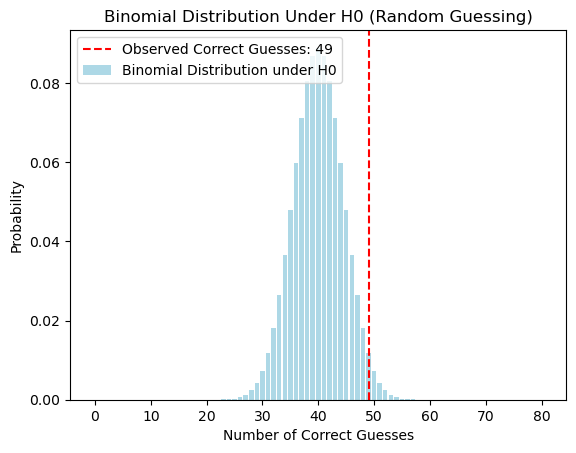

In [16]:
import matplotlib.pyplot as plt

# Plotting the binomial distribution under H0
x = np.arange(0, n_students + 1)
binom_pmf = binom.pmf(x, n_students, p_null)

plt.bar(x, binom_pmf, color='lightblue', label='Binomial Distribution under H0')
plt.axvline(n_correct, color='red', linestyle='--', label=f'Observed Correct Guesses: {n_correct}')
plt.title('Binomial Distribution Under H0 (Random Guessing)')
plt.xlabel('Number of Correct Guesses')
plt.ylabel('Probability')
plt.legend()
plt.show()

##### Findings and Discussion

P-Value Interpretation:
- The computed p-value is the probability of observing 49 or more correct guesses if the students were randomly guessing.
- If the p-value is small (commonly < 0.05), we reject the null hypothesis and conclude that there is evidence that students have some ability to distinguish between the two methods of pouring tea.

In this case, the p-value will provide a clear indication of whether the observed result (49 correct guesses) is statistically significant or can be explained by random guessing.

Conclusion Regarding the Null Hypothesis:
Based on the p-value 0.0283 < 0.05 : Reject 𝐻0 there is evidence that the students can distinguish between the tea and milk pouring order.

### 9.

Yes.